In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fruits/HueValuemerged%20-%20HueValue%20CSV%20File.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

(300, 3)


<AxesSubplot:xlabel='Hue', ylabel='Day'>

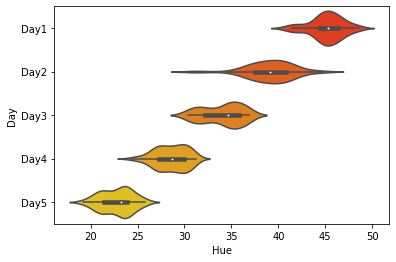

In [3]:
dataset = pd.read_csv('../input/fruits/HueValuemerged%20-%20HueValue%20CSV%20File.csv')
dataset.describe
print(dataset.shape)

sns.violinplot(x= 'Hue',y = 'Day',data = dataset,palette='autumn')



# Linear Regression Model

Loss 0.1264338114260442


<AxesSubplot:xlabel='Hue', ylabel='Level'>

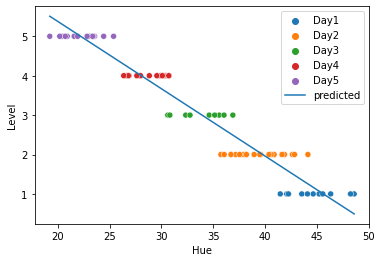

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(dataset['Hue'],dataset['Level'],random_state=20)
X_train1 = X_train.values.reshape(-1,1)
X_test1 = X_test.values.reshape(-1,1)
reg = LinearRegression().fit(X_train1,Y_train)


predict= reg.predict(X_test1)
loss = mean_squared_error(Y_test,predict)


print("Loss",loss)
sns.scatterplot(x=X_test,y=Y_test,data= dataset ,hue="Day")
sns.lineplot(x= X_test,y=predict,label="predicted")



# KNN CLASSIFIER

In [5]:
X_train1 = X_train.values.reshape(-1,1)
X_test1 = X_test.values.reshape(-1,1)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train1)
X_test = sc.transform(X_test1)

 
# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
classifier.fit(X_train,Y_train) 
 
 
# Predicting the Test set results
y_pred = classifier.predict(X_test)
 
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,y_pred)*100)
 
 
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_test, y_pred)
print(cm)
report = classification_report(Y_test, y_pred)
print(report)

85.33333333333334
[[13  1  0  0  0]
 [ 3 14  4  0  0]
 [ 0  0  7  2  0]
 [ 0  0  0 16  0]
 [ 0  0  0  1 14]]
              precision    recall  f1-score   support

           1       0.81      0.93      0.87        14
           2       0.93      0.67      0.78        21
           3       0.64      0.78      0.70         9
           4       0.84      1.00      0.91        16
           5       1.00      0.93      0.97        15

    accuracy                           0.85        75
   macro avg       0.84      0.86      0.84        75
weighted avg       0.87      0.85      0.85        75



/opt/conda/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:246: UserWarning: No contour levels were found within the data range.
  antialiased=True)
/opt/conda/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:279: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  **scatter_kwargs)


<AxesSubplot:>

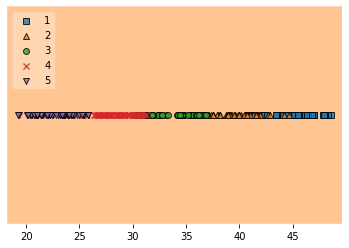

In [6]:


#Plotting decision boundary
X= dataset.Hue
Y = dataset.Level
X= X.to_numpy()
X = X.reshape(-1,1)
Y = Y.to_numpy()
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,Y,clf= classifier,legend=2)

# SVM

/opt/conda/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:279: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  **scatter_kwargs)


<AxesSubplot:>

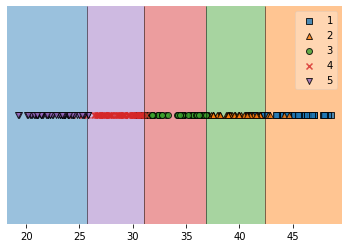

In [7]:
from sklearn.svm import SVC

svm = SVC(C=0.5,kernel='linear')
svm.fit(X,Y)

plot_decision_regions(X,Y, clf=svm)